In [1]:
# Importing the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [2]:
# Read the dataset.
df=pd.read_csv('Space server dataset')

In [3]:
# dataframe.
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [4]:
# heading the data.
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
# tail of the dataset.
df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [6]:
# columns of the data.
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
# Describing the data.
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
# information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [9]:
# finding the null values.
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [10]:
# dropping the null values.
df.dropna()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [11]:
# Finding correlation of the dataset.
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


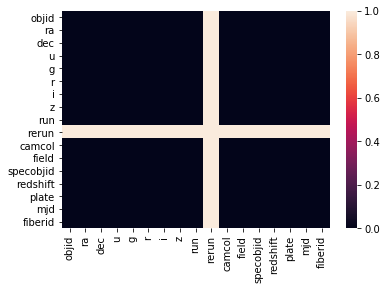

In [12]:
# visualizing the correlation through heatmap.
sns.heatmap(df.corr().isnull())

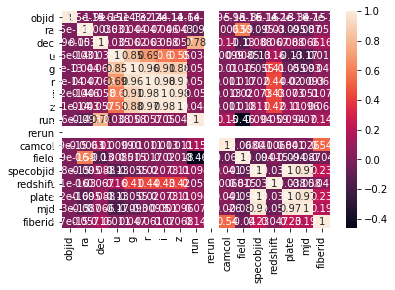

In [13]:
sns.heatmap(df.corr(),annot=True)

objid            AxesSubplot(0.125,0.71587;0.133621x0.16413)
ra            AxesSubplot(0.285345,0.71587;0.133621x0.16413)
dec            AxesSubplot(0.44569,0.71587;0.133621x0.16413)
u             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
g             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
r               AxesSubplot(0.125,0.518913;0.133621x0.16413)
i            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
z             AxesSubplot(0.44569,0.518913;0.133621x0.16413)
run          AxesSubplot(0.606034,0.518913;0.133621x0.16413)
rerun        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
camcol          AxesSubplot(0.125,0.321957;0.133621x0.16413)
field        AxesSubplot(0.285345,0.321957;0.133621x0.16413)
specobjid     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
redshift     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
plate        AxesSubplot(0.766379,0.321957;0.133621x0.16413)
mjd                AxesSubplot(0.125,0.125;0.133621x0.16413)
fiberid         AxesSubp

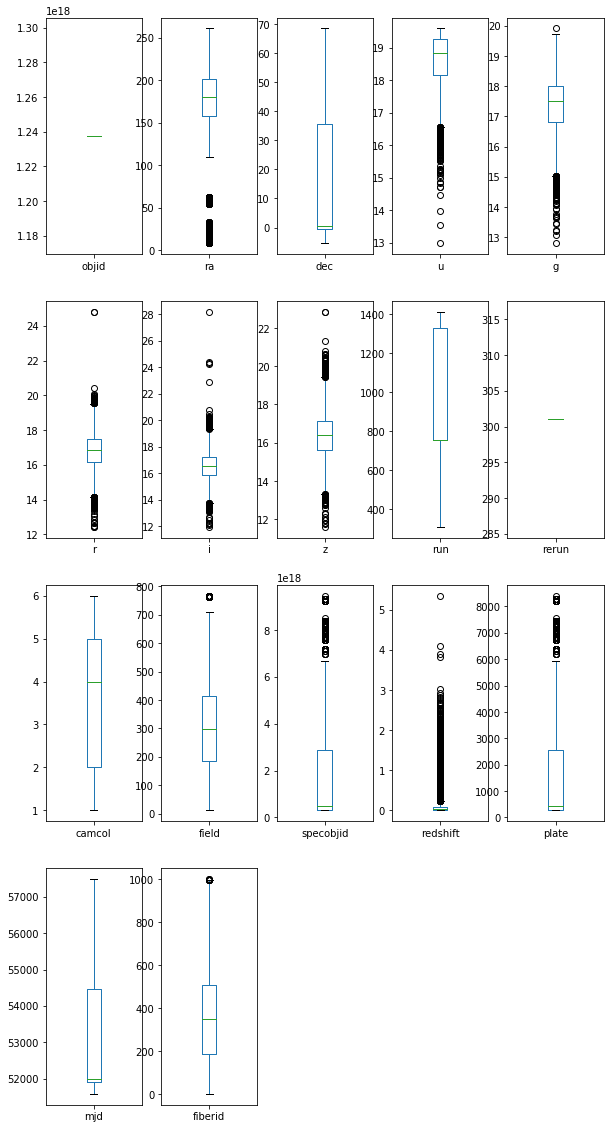

In [14]:
# Finding Outliers of the data through boxplot.
df.plot(kind='box',subplots = True, layout=(4,5),figsize = (10,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9223f5a90>]],
      dtype=object)

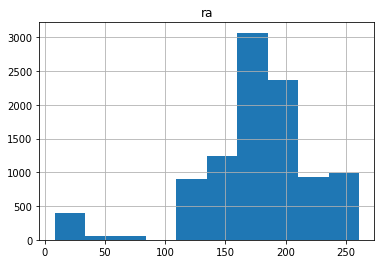

In [15]:
# visualizing the 'ra' through histogram.
df.hist('ra')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb921bfddd0>]],
      dtype=object)

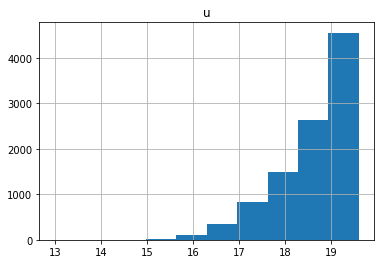

In [16]:
# visualizing the 'u' through histogram.
df.hist('u')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb921ab4d50>]],
      dtype=object)

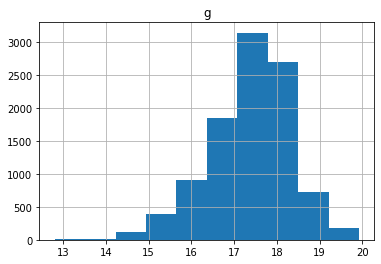

In [17]:
# visualizing the 'g' through histogram.
df.hist('g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb921b79c10>]],
      dtype=object)

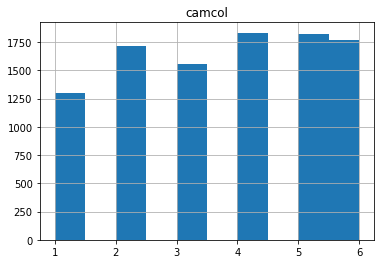

In [18]:
# visualizing the camol through histogram.
df.hist('camcol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb92292eed0>]],
      dtype=object)

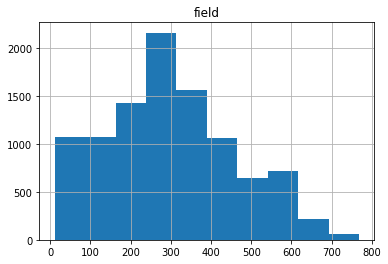

In [19]:
# visualizing the field through histogram.
df.hist('field')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb922d8a990>]],
      dtype=object)

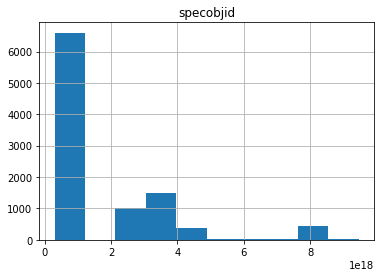

In [20]:
# visualizing the specobjid through histogram.
df.hist('specobjid')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb922f7a210>]],
      dtype=object)

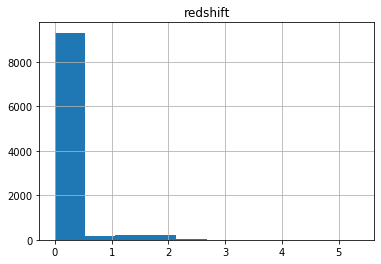

In [21]:
# visualizing the redshift through histogram.
df.hist('redshift')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb923058710>]],
      dtype=object)

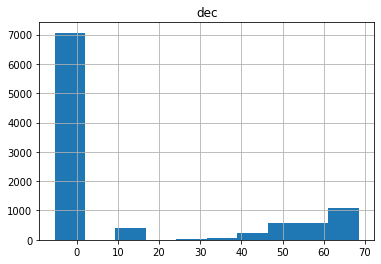

In [22]:
# visualizing the dec through histogram.
df.hist('dec')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb92326c4d0>]],
      dtype=object)

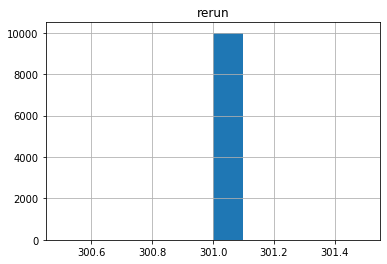

In [23]:
# visualizing the rerun through histogram.
df.hist('rerun')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb923059850>]],
      dtype=object)

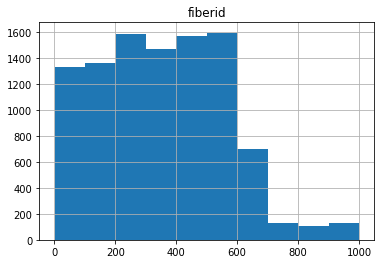

In [24]:
# visualizing the fiberid through histogram.
df.hist('fiberid')

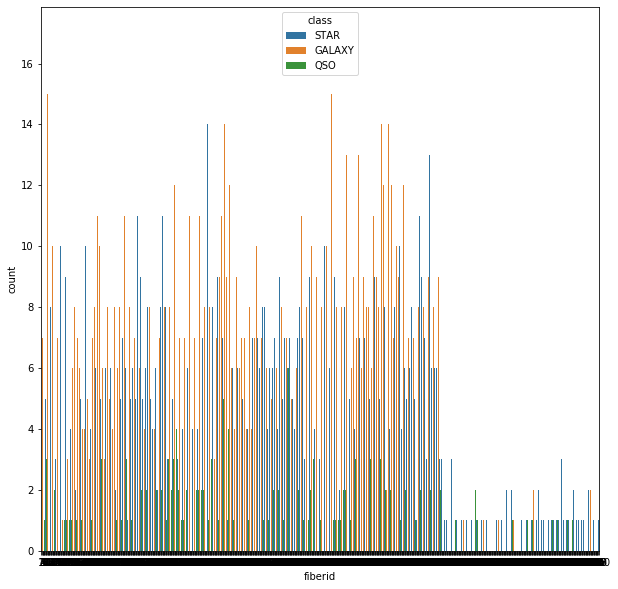

In [25]:
# countplot of fiberid  through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['fiberid'],hue=df['class'])
plt.show()

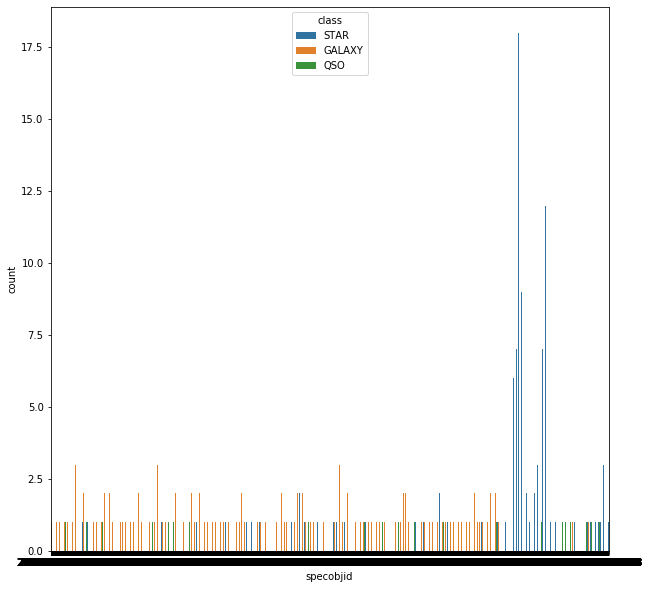

In [26]:
# countplot of specobjid through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['specobjid'],hue=df['class'])
plt.show()

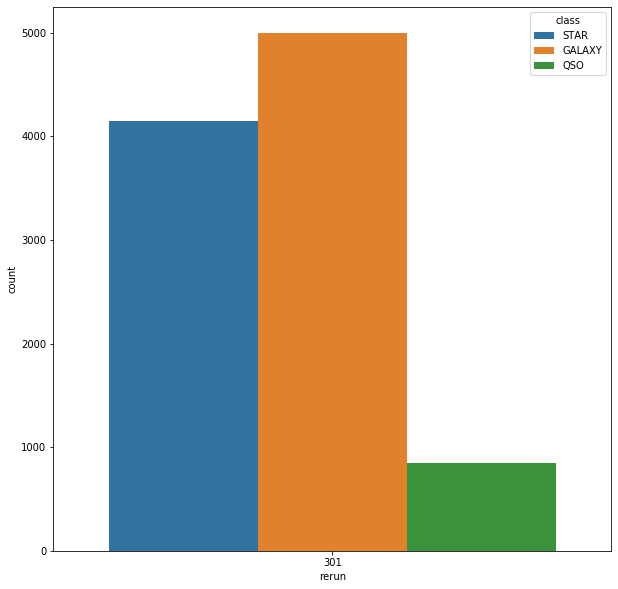

In [27]:
# countplot of rerun through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['rerun'],hue=df['class'])
plt.show()

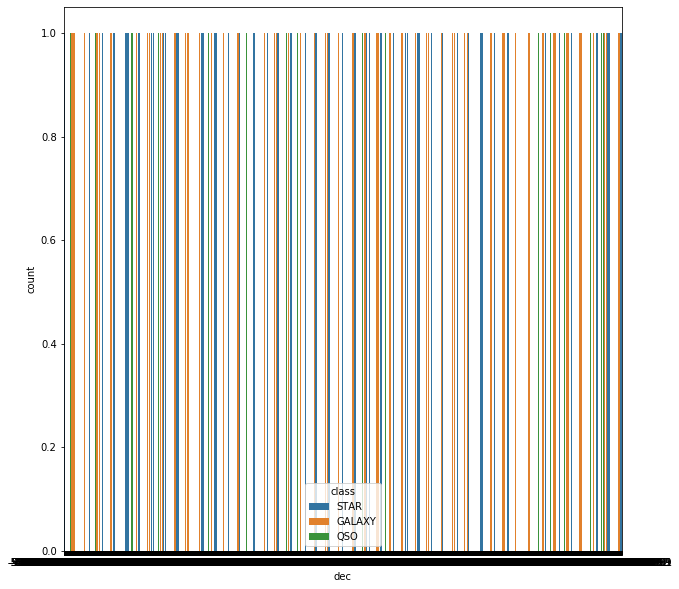

In [28]:
# countplot of dec through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['dec'],hue=df['class'])
plt.show()

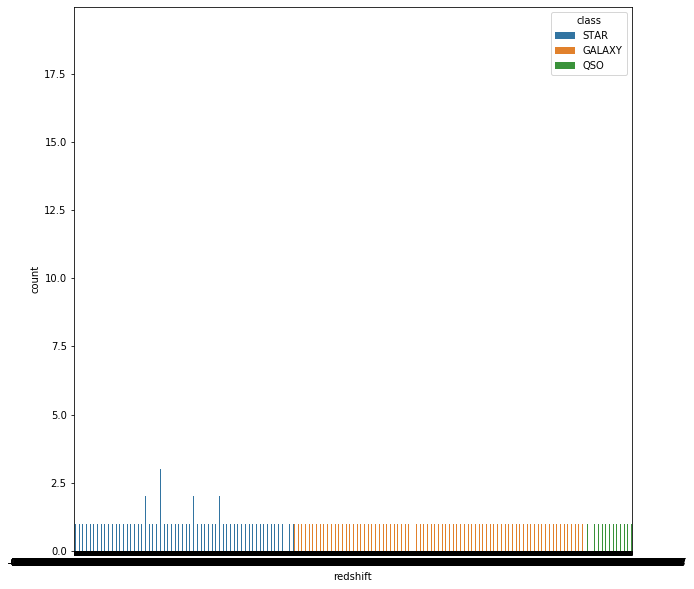

In [29]:
# countplot of redshift through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['redshift'],hue=df['class'])
plt.show()

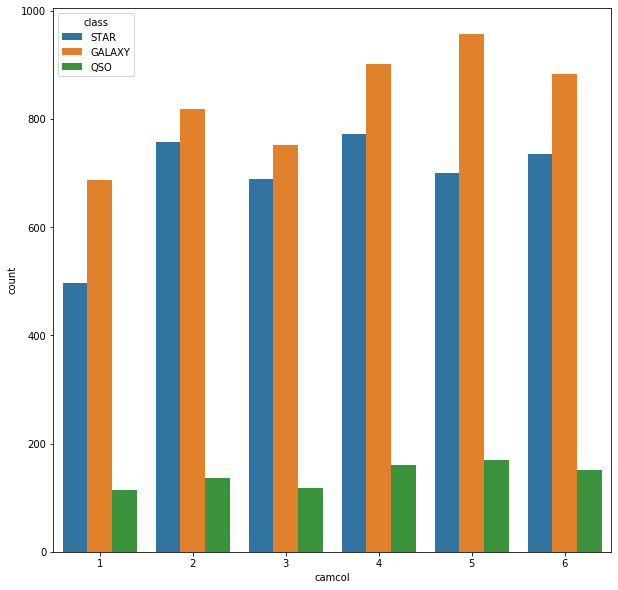

In [30]:
# countplot of camcol through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['camcol'],hue=df['class'])
plt.show()

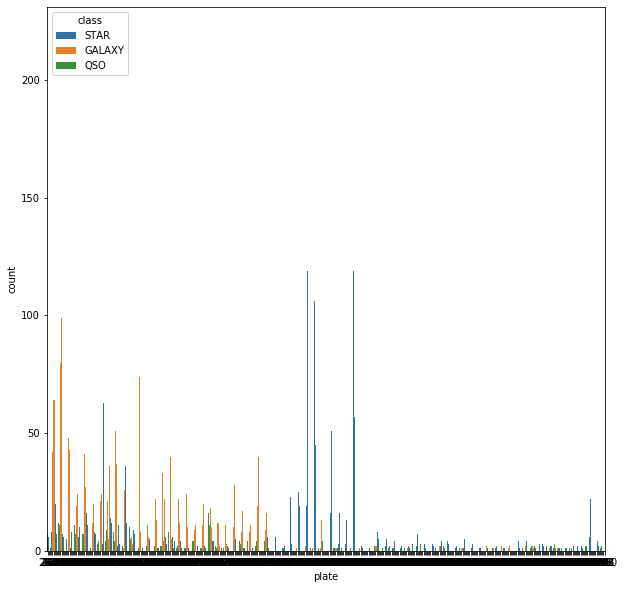

In [31]:
# countplot of plate through seaborn.
plt.figure(figsize=[10,10])
sns.countplot(x=df['plate'],hue=df['class'])
plt.show()

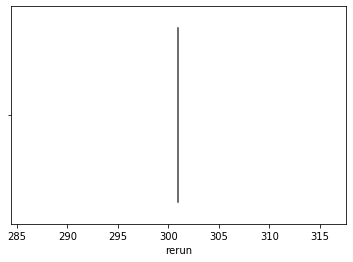

In [32]:
# visulazing the rerun column through violin plot.
sns.violinplot(df['rerun'])

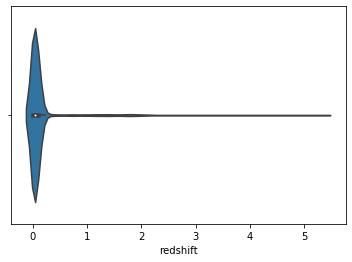

In [33]:
# visulazing the  redshift through violin plot.
sns.violinplot(df['redshift'])

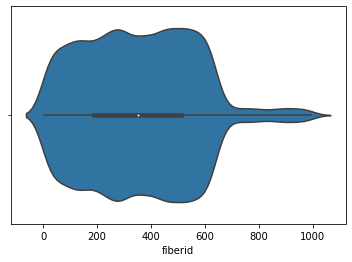

In [34]:
# visulazing the fiberid through violin plot.
sns.violinplot(df['fiberid'])

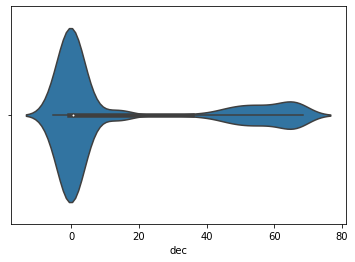

In [35]:
# visulazing the dec through violin plot.
sns.violinplot(df['dec'])

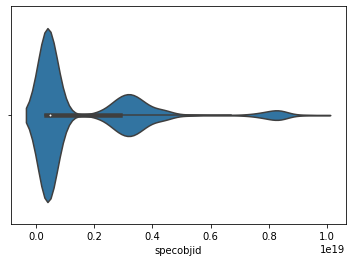

In [36]:
# visulazing the specobjid through violin plot.
sns.violinplot(df['specobjid'])

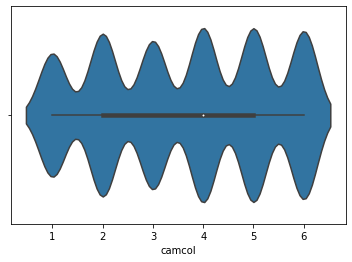

In [37]:
# visulazing the camcol through violin plot.
sns.violinplot(df['camcol'])

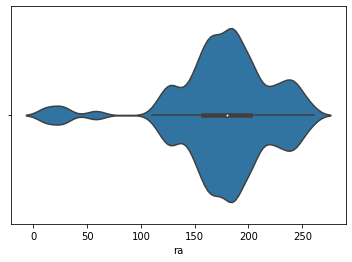

In [38]:
# visulazing the 'ra' through violin plot.
sns.violinplot(df['ra'])

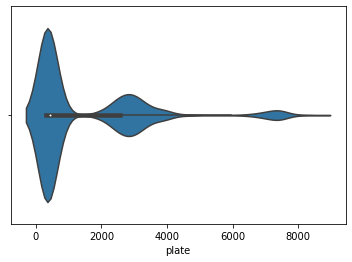

In [39]:
# visulazing the plate through violin plot.
sns.violinplot(df['plate'])

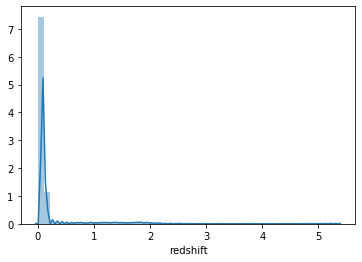

In [40]:
# visulazing the redshift through distribution plot.
sns.distplot(df['redshift'])
plt.show()

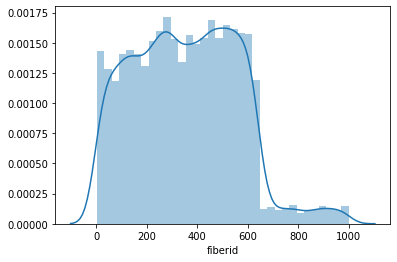

In [41]:
# visulazing the fiberid through distribution plot.
sns.distplot(df['fiberid'])

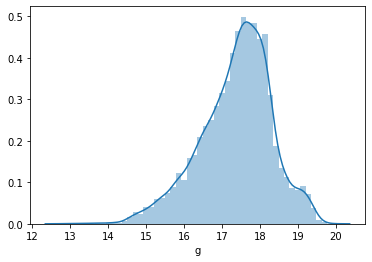

In [42]:
# visulazing the 'g' through distribution plot.
sns.distplot(df['g'])

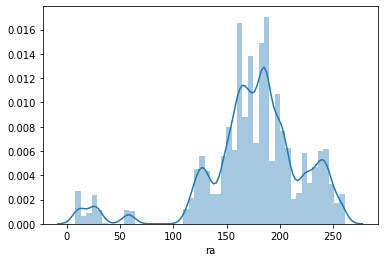

In [43]:
# visulazing the 'ra' through distribution plot.
sns.distplot(df['ra'])

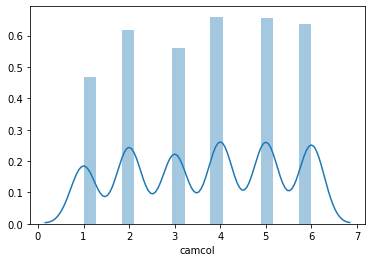

In [44]:
# visulazing the camol through distribution plot.
sns.distplot(df['camcol'])

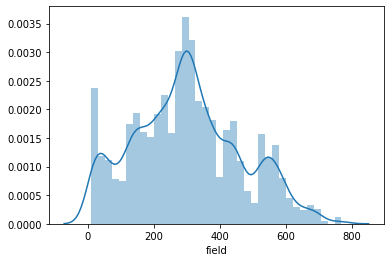

In [45]:
# visulazing the field through distribution plot.
sns.distplot(df['field'])

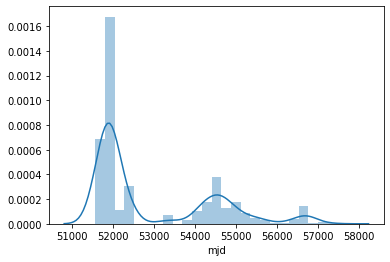

In [46]:
# visulazing the 'mjd' through distribution plot.
sns.distplot(df['mjd'])

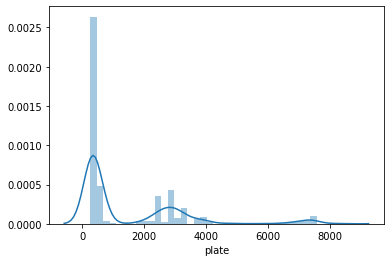

In [47]:
# visulazing the plate through distribution plot.
sns.distplot(df['plate'])

In [48]:
# taking the values for training and testing.
x=df.drop(columns=['class'])

In [49]:
x

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229


In [50]:
y=df.iloc[:,-5]

In [51]:
y

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object

In [52]:
# splitting the data into training and testing datasets.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [53]:
# Using DecisionTreeClassifier.
dt=DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [54]:
# Accuracy of Predicted dataset.
print('Acurracy:',metrics.accuracy_score(y_test, y_pred))

Acurracy: 0.989


In [55]:
# Finding confusion_matrix of the model.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[986,  10,   1],
       [ 10, 174,   0],
       [  1,   0, 818]])

In [56]:
# Finding classification_report of the model.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       997
         QSO       0.95      0.95      0.95       184
        STAR       1.00      1.00      1.00       819

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [57]:
# Finding Croos-validation score of the model.
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(),x,y,cv=5,scoring='accuracy').mean()

0.9843

In [58]:
# saving the model as a pickle in the file.
from sklearn.externals import joblib
joblib.dump(DecisionTreeClassifier,'Avacado.pkl')

['Avacado.pkl']